# Customer Churn Prediction - Classification

## Objective

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Customer Churning and its Importance

Customer churn is simply the rate at which customers leave doing business with an entity. Simply put, churn prediction involves determining the possibility of customers stopping doing business with an entity. In other words, if a consumer has purchased a subscription to a particular service, we must determine the likelihood that the customer would leave or cancel the membership.

<br>
It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones. Customer churn measures how and why are customers leaving the business.
<br><br>

To calculate the customer churn
- divide the number of customers leaving a business in a given time interval by the number of customers that are present at the beginning of the period.


## Data Detailing

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device -protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<u><h6>The data for this project is in a csv format. The following describes the columns present in the data.</h6></u>

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# Save Model for future use
import joblib

# Getting the Data
- We shall use one csv file called Telco_Customer_Churn.csv in this project

In [2]:
customer_tel = pd.read_csv('C:\\Users\\kishl\\Downloads\\Telecom-Churn-Prediction-Streamlit-App-main\\Telecom-Churn-Prediction-Streamlit-App-main\\Data\\Telco_Customer_Churn.csv')

In [3]:
# See first 5 rows of df_telco_cust

customer_tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get more information about the dataset
customer_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

### See if there are any missing values in df_telco_cust

In [5]:
# See if there are any missing values in df_telco_cust
missing_values_count = customer_tel.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Check for duplicates in the dataset

In [6]:
# Checking for duplicates
customer_tel.drop_duplicates(inplace=True, keep='first')

In [7]:
customer_tel

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### There were no duplicates in the dataset

### See all unique values in every column in df_telco_cust dataset

In [8]:
# see all unique values in every column in df_telco_cust dataset
for column in customer_tel.columns:
    print(column, ":", customer_tel[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

### Show  the number of unique values per column

In [9]:
#  the number of unique values per column
for column in customer_tel.columns:
    print(column, ":", customer_tel[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


# Transformation and Feature Engineering

### Data types of the TotalCharges and MonthlyCharges columns in the customer_tel dataframe

In [10]:
# Check the data type of the TotalCharges column in the df_telco_cust dataframe
print(customer_tel['TotalCharges'].dtype)
print(customer_tel['MonthlyCharges'].dtype)

object
float64


### Transform TotalCharges from object to float data type
To transform the TotalCharges column from object to float in the customer_tel dataframe, we can use the astype() method of pandas.

In [11]:
# Transform the TotalCharges column from object to float 
# Convert 'TotalCharges' to numeric type
customer_tel['TotalCharges'] = pd.to_numeric(customer_tel['TotalCharges'], errors='coerce')

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')
# customer_tel['TotalCharges'] = imputer.fit_transform(customer_tel[['TotalCharges']])

In [12]:
# Again check the data type of the TotalCharges column in the df_telco_cust dataframe
print(customer_tel['TotalCharges'].dtype)

float64


In [13]:
customer_tel

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
# See again if there are any missing values in df_telco_cust
missing_values_count = customer_tel.isnull().sum()
print(missing_values_count)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

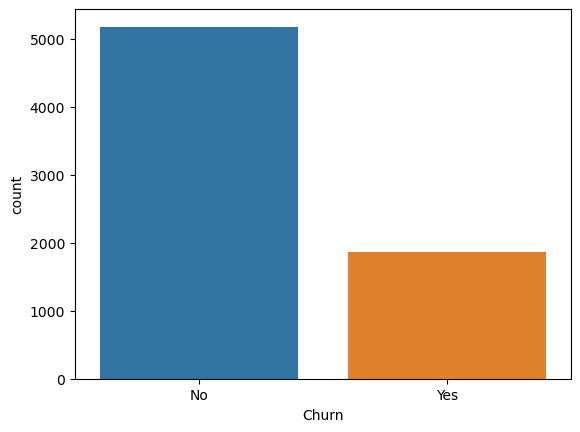

In [15]:
sns.countplot(data=customer_tel,x='Churn')

# Univeriate Analysis

#### Gender
- The code below creates a horizontal bar chart showing the count of each gender in the "gender" column of the "customer_tel" DataFrame.

- The "value_counts()" method is used to count the number of occurrences of each gender in the "gender" column, and the resulting object is stored in the "gender_count" variable.

- A list of two colors, "red" and "green", is created and stored in the "colors" variable.

- The "plot()" method of the "gender_count" object is then used to create a horizontal bar chart, with the "kind" parameter set to "barh" to specify the chart type and the "color" parameter set to "colors" to specify the color scheme.

- A for loop is used to loop through each bar in the chart and annotate the actual count in the center of each bar using the "text()" method of the "ax" object.

- Finally, the chart is given a title, labels for the x and y axes, and a size using various functions of the "plt" module, and displayed using the "show()" method of the "plt" module.

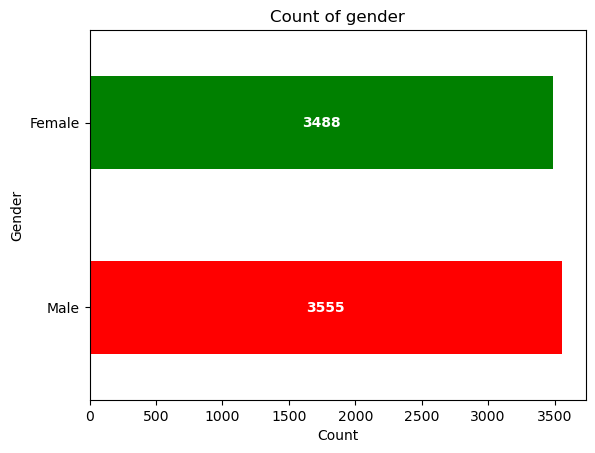

<Figure size 600x400 with 0 Axes>

In [16]:
# counts the number of occurrences of each gender in the 'gender' column of the 
gender_count = customer_tel['gender'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'green']

# This line creates the horizontal bar chart using the plot() function of the gender_count object
ax = gender_count.plot(kind='barh', color=colors)


# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(gender_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.figure(figsize=(6,4))

plt.show()

From the plot we see that Female and Male are almost equally distributed with a difference of only 67.

### Senior Citizens
- The code below creates a horizontal bar chart that displays the count of senior and non-senior citizens in a dataset. The code first uses the value_counts() function to count the number of occurrences of each value in the 'SeniorCitizen' column of the dataset. It then creates a list of colors to use in the bar chart and uses the plot() function of the citizen_count object to create a horizontal bar chart.

- The code then loops through the bars and annotates the actual count in the center of each bar using the text() function. - Finally, the code adds a label, title, and size to the chart before displaying it using plt.show().

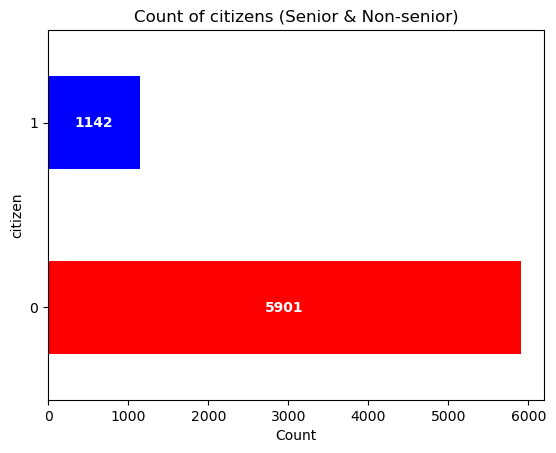

<Figure size 600x400 with 0 Axes>

In [17]:
# This code will plot a horizontal bar chart showing the count of senior and non-senior citizens 
citizen_count = customer_tel['SeniorCitizen'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'blue']

# This line creates the horizontal bar chart using the plot() function of the citizen_count object
ax = citizen_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(citizen_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')
    
# Adding label, title and size
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('citizen')
plt.figure(figsize=(6,4))

plt.show()

From the plot see that the ratio of Senior Citizens to Non-Senior Citizen is about 1:5. With Non-Seniors constituting about 84% of the whole distribution.

### Tenure
The code below creates a histogram plot for the 'tenure' variable from the 'customer_tel' dataframe using the Seaborn library in Python.

- The 'sns.histplot' function is used to create the histogram plot, with the 'customer_tel['tenure']' argument specifying the data to be plotted.

- The 'kde=True' argument adds a kernel density estimate plot to the histogram, providing a smoothed line that shows the distribution of values in the data.

- The 'color' argument is used to set the color of the histogram bars to red.

- Overall, the code is a simple and effective way to visually explore the distribution of values in the 'tenure' variable of the 'customer_tel' dataframe.

<Axes: xlabel='tenure', ylabel='Count'>

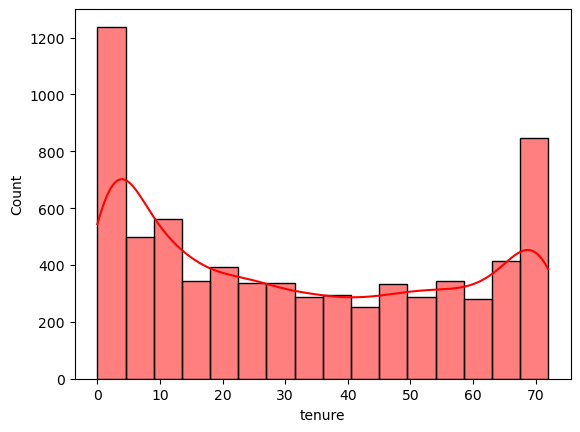

In [18]:
# creates a histogram plot using the Seaborn library in Python.
sns.histplot(customer_tel['tenure'], kde=True, color='red')

From the graph, we visualize that there is almost a uniform distribution of Tenure between 10 to 65 months at about 400 customers each and a peek of slightly above 1200 customers with a Tenure 0-5 months and a gain a peek of about 800 customers with a Tenure of 70 and above months.

### Streaming Movies
The code below generates a horizontal bar chart that displays the count of different streaming movies that customers have subscribed to.

1. The first line counts the number of occurrences of each value in the 'StreamingMovies' column of the DataFrame and stores the result in the stream_movie_count variable.

2. The second line creates a list of three colors to be used in the horizontal bar chart.

3. The third line creates the horizontal bar chart using the plot() method of the stream_movie_count object with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors.

4. The fourth line uses a for loop to annotate the actual count of each value in the center of its respective bar.

5. Finally, the code adds a title and labels for the x and y-axes, sets the size of the figure, and shows the plot using the show() function.

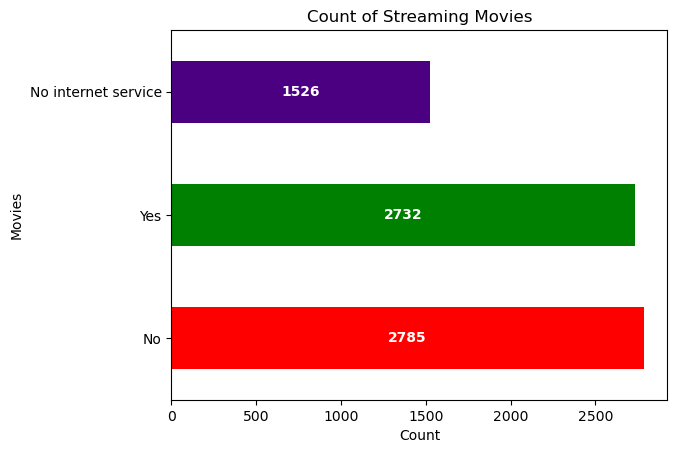

<Figure size 600x400 with 0 Axes>

In [19]:
# First, we obtain a count of the different values in the 'StreamingMovies' 
# column of a Pandas DataFrame named 'customer_tel'
stream_movie_count = customer_tel['StreamingMovies'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green', 'indigo']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars,
# and the color parameter set to the list of colors we defined earlier
ax = stream_movie_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(stream_movie_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6,4))

plt.show()

Customers who have streaming movies connections are 2732 and those without are 2785 (only a difference of 53 between the two) with those with no Internet being only 1526.

### MultipleLines
The code below is plotting a horizontal bar chart that shows the count of customers with multiple phone lines, categorized by the different types of multiple lines available to them.

1. First, the code creates a Pandas Series object called mul_col_count that contains the count of each unique value in the 'MultipleLines' column of the 'customer_tel' DataFrame.

2. Next, a list of colors is defined to be used for the bars in the horizontal bar chart.

3. Then, the horizontal bar chart is created using the plot() method of the mul_col_count object, with the kind parameter set to 'barh' for horizontal bars and the color parameter set to the list of colors previously defined.

4. After that, the code loops through each bar in the chart and annotates the actual count in the center of each bar using the text() method.

5. Finally, the code adds a title, xlabel and ylabel to the chart using the title(), xlabel() and ylabel() methods, respectively, and sets the figure size using the figure() method. The chart is then displayed using the show() method.

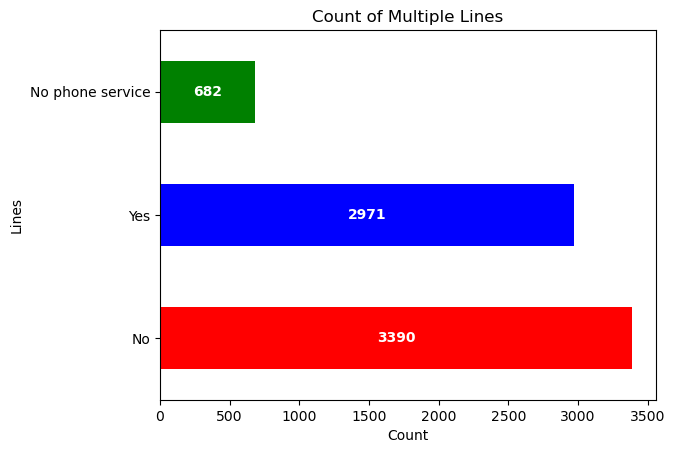

<Figure size 600x400 with 0 Axes>

In [20]:
# First, we obtain a count of the different values in the 'MultipleLines' 
# column of a Pandas DataFrame named 'customer_tel'
mul_col_count = customer_tel['MultipleLines'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars,and the color parameter set to the list of colors we defined earlier
ax = mul_col_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(mul_col_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Multiple Lines')
plt.xlabel('Count')
plt.ylabel('Lines')
plt.figure(figsize=(6,4))

plt.show()

The bar graph shows the distribution of customers with or without Multiplelines as follows: No Multiple lines: 48%, With Multiplelines: 42% and  those with no phone services: 10%.

### Online Security
The code below creates a horizontal bar chart to display the count of different values in the 'OnlineSecurity' column of a Pandas DataFrame named 'customer_tel'.

1. The first line of the code counts the number of occurrences of each value in the 'OnlineSecurity' column of the 'customer_tel' DataFrame, and stores the result in the variable 'online_sec_count'.

2. Then, a list of colors for the bars in the horizontal bar chart is defined as 'colors'.

3. The horizontal bar chart is created using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors defined earlier. The resulting plot is stored in the variable 'ax'.

4. Next, a loop is used to iterate through each bar in the plot and annotate the actual count of each value in the center of each bar.

5. Finally, the plot is given a title, axis labels, and a size, and is displayed using the matplotlib.pyplot.show() function.

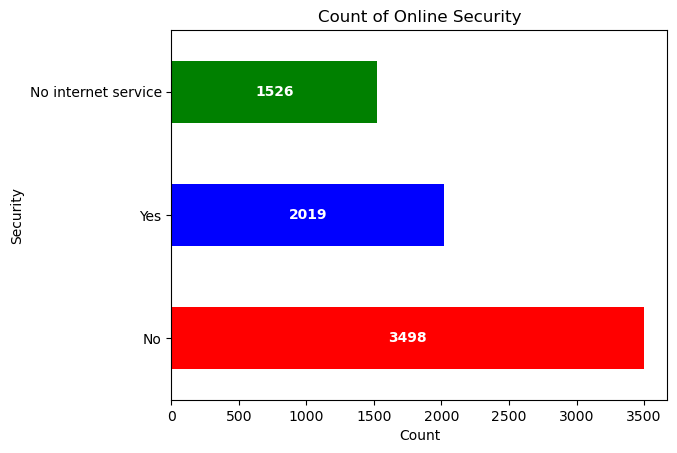

<Figure size 600x400 with 0 Axes>

In [21]:
# First, we obtain a count of the different values in the 'OnlineSecurity' 
# column of a Pandas DataFrame named 'customer_tel'
online_sec_count = customer_tel['OnlineSecurity'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter 
# set to 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = online_sec_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(online_sec_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Online Security')
plt.xlabel('Count')
plt.ylabel('Security')
plt.figure(figsize=(6,4))

plt.show()

The graph shows that customers without Online Security constitute around 50% followed by those with online security at 29% and the rest have no Internet service.

### Partner
The code below creates a horizontal bar chart to show the count of customers who have a partner and those who don't.

1. The first line of code gets the count of the different values in the 'Partner' column of the Pandas DataFrame 'customer_tel' using the value_counts() method.

2. Next, a list of colors for the bars in the horizontal bar chart is defined.

3. The horizontal bar chart is then created using the plot() method of the partner_count object with the parameters kind='barh' for horizontal bars and color=colors for the colors of the bars.

4. The for loop is used to loop through the bars and annotate the actual count in the center of each bar using the text() method of the ax object.

5. Finally, the code adds labels, title, and sets the figure size before displaying the chart using the show() method of the pyplot module in matplotlib.

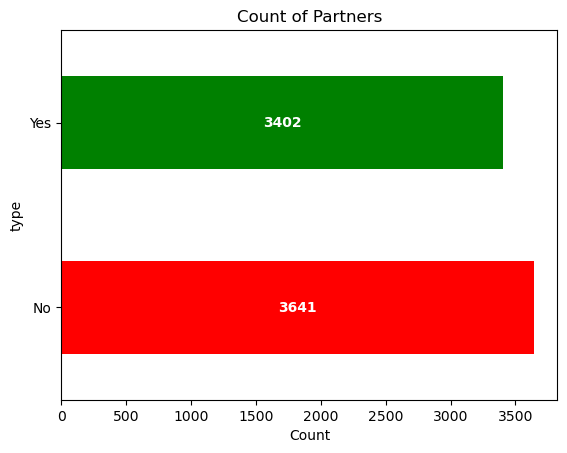

<Figure size 600x400 with 0 Axes>

In [22]:
# First, we obtain a count of the different values in the 'Partner' 
# column of a Pandas DataFrame named 'customer_tel'
partner_count = customer_tel['Partner'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = partner_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(partner_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Partners')
plt.xlabel('Count')
plt.ylabel('type')
plt.figure(figsize=(6,4))

plt.show()

Customers without partners make the majority at around 52% and those with parners at 48%.

# Bivariate and Multivariate Analysis

## Bivariate Analysis
### Gender vs Churn
The code below creates a pivot table from a Pandas DataFrame customer_tel. The pivot_table() method is used to group and aggregate the data based on the provided parameters. The pivot table is created by specifying that the values to be aggregated are in the 'Contract' column, with the index being the 'gender' column, and the columns being the 'Churn' column. The aggregation function is set to 'count', which counts the number of occurrences of each unique combination of 'gender' and 'Churn'.

The resulting pivot table is printed using the print() function. It will display the counts of the 'Contract' column for each unique combination of 'gender' and 'Churn' in a tabular format.

In [23]:
# Create a pivot table of contracts counts by gender and churn
pivot_table = pd.pivot_table(customer_tel, values = ['Contract'], index=['gender'], columns=['Churn'], aggfunc='count')

# Print the pivot table
print(pivot_table)

       Contract     
Churn        No  Yes
gender              
Female     2549  939
Male       2625  930


## Visualization
The code below generates a stacked bar chart of the pivot table created in the previous code block.

1. pivot_table.plot(kind='bar', stacked=True) creates the bar chart with the stacked parameter set to True to stack the bars on top of each other.

2. plt.title('Count of Contract by gender and Churn') sets the chart title to "Count of Contract by gender and Churn". plt.xlabel('gender') sets the x-axis label to "gender", and plt.ylabel('Count') sets the y-axis label to "Count".

3. plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) adds a legend to the chart with the location set to 'upper right' and the bounding box anchor set to (1.2, 1), which means that the legend will be located outside the plot area to the right and above the chart.

4. plt.xticks(rotation=0) adjusts the rotation of the x-axis labels to be horizontal for better readability.

5. Finally, plt.show() displays the chart.

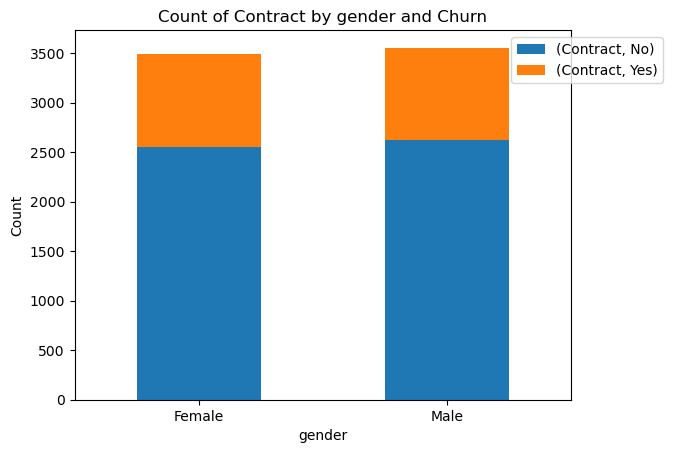

In [24]:
# We create a bar chart using a pivot table with the Pandas plot() method, with the kind parameter set to 
# 'bar' for vertical bars, and the stacked parameter set to True to stack the bars on top of each other
pivot_table.plot(kind='bar', stacked = True)

# Adding label, title and size
plt.title('Count of Contract by gender and Churn')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# We adjust the rotation of the x-axis labels to be horizontal for better readability
plt.xticks(rotation=0)
plt.show()

The stacked-bar chart shows that Female and Male are almost uniformly distributed considering those who churn and those who don't.

### SeniorCitizens vs Churn
The code below creates a bar plot using the Seaborn library. 
- It visualizes the relationship between the SeniorCitizen column and Churn column of a given Pandas DataFrame customer_tel. 
- The x parameter specifies the column to be plotted on the x-axis and the y parameter specifies the column to be plotted on the y-axis. 
- The hue parameter specifies the column to use to distinguish the different bars in the plot. In this case, the hue parameter is set to 'gender', which means that the bars are grouped by gender. 
- The resulting plot shows the count of churned and non-churned customers based on whether they are senior citizens or not, with bars distinguished by gender.

<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

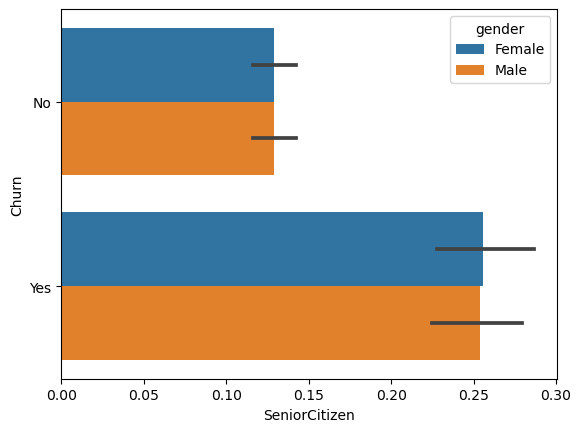

In [25]:
sns.barplot(data=customer_tel, x='SeniorCitizen', y='Churn', hue='gender')

The graph shows that many senior citizens churn and the distribution is uniform between male and female.

### Partner vs Churn
The code below creates a count plot with the x-axis being Partner and the hue (color) representing Churn. The plot will show the number of customers who churned and who didn't churn with and without a partner.

<Axes: xlabel='Partner', ylabel='count'>

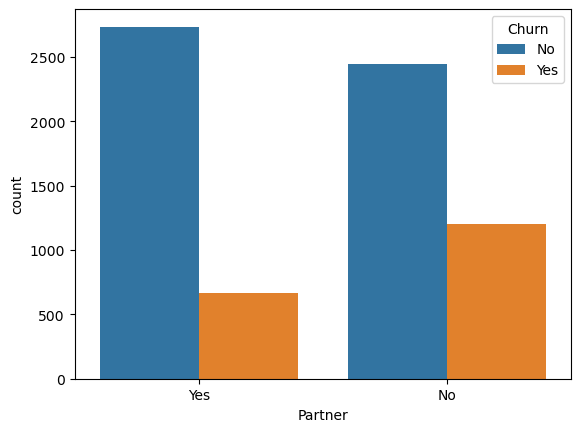

In [26]:
sns.countplot(data=customer_tel, x='Partner', hue='Churn')

Those without partners tend to churn more than those with partners.

### Dependent vs Churn
The code below creates a bar plot with the number of customers with and without Dependents, grouped by whether they have Churned or not. The countplot() function in seaborn counts the number of occurrences of each category and creates a bar plot of the counts.

<Axes: xlabel='Dependents', ylabel='count'>

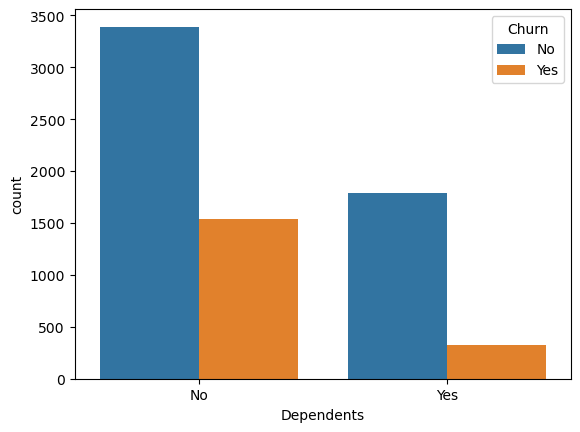

In [27]:
sns.countplot(x='Dependents', hue='Churn', data=customer_tel)

Those without dependents tend to churn more than those with dependents.

### MonthlyCharges vs Churn
- The code below creates a box plot using Seaborn library to visualize the relationship between the "MonthlyCharges" and "Churn" variables in the "customer_tel" dataset.

- The box plot is created using the boxplot() function in Seaborn, with "MonthlyCharges" as the x-axis and "Churn" as the y-axis. The data parameter specifies the DataFrame to use.

- After creating the box plot, the code sets the x-axis and y-axis labels using xlabel() and ylabel() functions, respectively. It also sets the title of the plot using title() function.

- Finally, the code displays the plot using show() function.

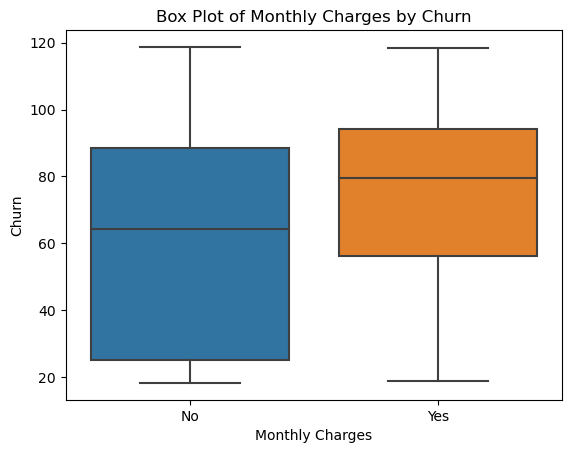

In [28]:
# create a box plot using boxplot() function
sns.boxplot(x="Churn", y="MonthlyCharges", data=customer_tel)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

- By looking at the box plot, we can see that there are significant differences in the distribution of monthly charges for customers who churned compared to those who did not churn. 
    1. The median for those who don't churn is about 62 with 1st quartile of about 25 and 3rd quartile of about 90.
    2. The median for those who churn is about 80 with 1st quartile of about 55 and 3rd quartile of about 95.

### TotalCharges vs Churn
The code below creates a box plot to show the distribution of total charges for customers who have churned versus those who have not churned.

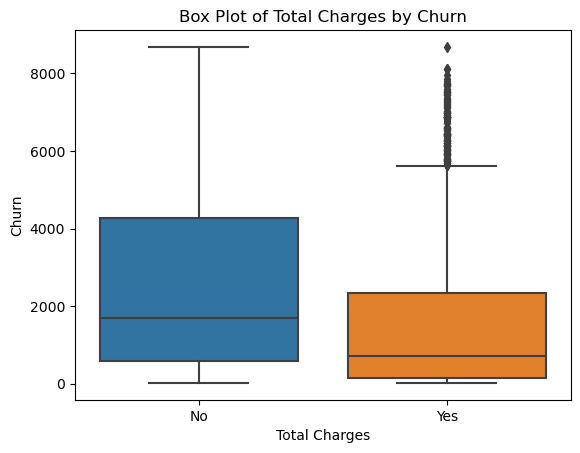

In [29]:
# create a box plot using boxplot() function
sns.boxplot(x="Churn", y="TotalCharges", data=customer_tel)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

Customers who tend to churn have their median Total Charges of about 500 but with several outliers beyond 5000.

### Internet Service vs Churn
The below creates a count plot showing the number of customers in each category of Internet Service (DSL, Fiber optic, or No) with the hue representing the Churn status (Yes or No).

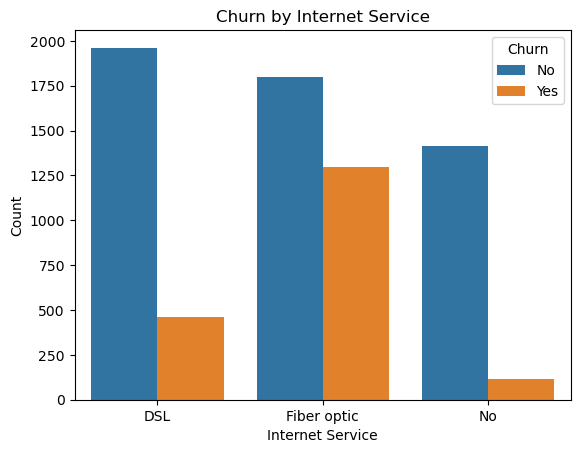

In [30]:
sns.countplot(data=customer_tel, x='InternetService', hue='Churn')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn by Internet Service")
plt.show()

It appears that those who churn most are those with Fiber optic Internet Service.

### PaymentMethod vs Churn
The code below generates a stacked bar chart that shows the relationship between Payment Method and Churn in the telco customer dataset.

1. The code first creates a contingency table of PaymentMethod and Churn using the pd.crosstab() function. This table summarizes the number of customers who churned and did not churn for each payment method.

2. Then, the code sets the figure size using plt.figure(figsize=(16,14)) and creates a stacked bar plot of the contingency table using payment_churn_table.plot(kind='bar', stacked=True). The stacked bar plot shows the number of customers for each payment method, with the different colors representing the number of customers who churned and did not churn.

3. Finally, the code sets the plot title, axis labels, and rotates the x-axis labels for better visibility using plt.title(), plt.xlabel(), plt.ylabel(), and plt.xticks(rotation=15) functions respectively. The plot is then displayed using plt.show().

<Figure size 1600x1400 with 0 Axes>

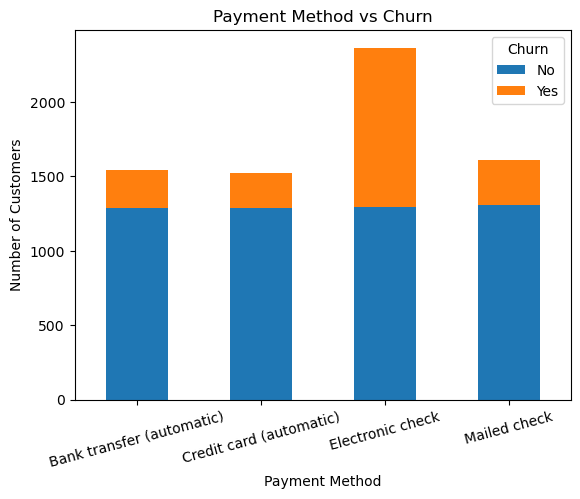

In [31]:
# create a contingency table of PaymentMethod and Churn
payment_churn_table = pd.crosstab(customer_tel['PaymentMethod'], customer_tel['Churn'])

plt.figure(figsize=(16,14))
# create a stacked bar plot
payment_churn_table.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

plt.xticks(rotation=15)

# display the plot
plt.show()

From the stack-bar chart it appears that those who churn most are those with Electronic check as a Payment Method.

## Multivariate Analysis

### Correletation of the Features in the dataset
The resulting heatmap shows the correlation coefficients between all pairs of variables in the dataset. Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker or no correlations. The diagonal of the matrix (i.e., the correlation of each variable with itself) is always 1.

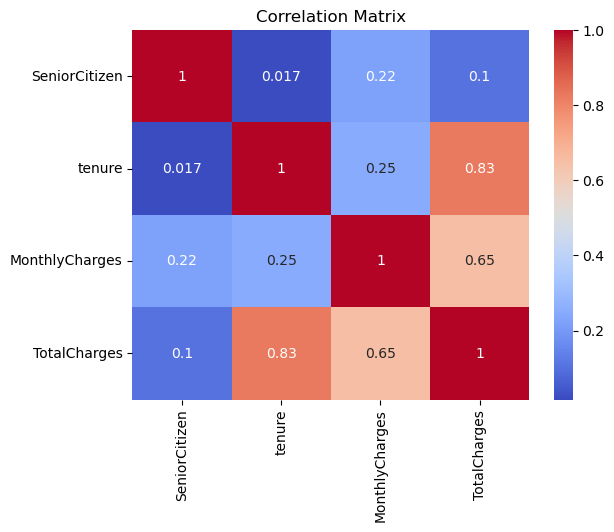

In [32]:
# compute the correlation matrix
corr_matrix = customer_tel.corr(numeric_only=True)

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

From the heatmap, we seen that there is very high correlation (0.82) between TotalCharges and tenure, also a fairly strong correlation of 0.65 between TotalCharges and MonthlyCharges.

### Scatter Matrix
- In the codebelow, we first select the columns that we want to include in the scatter plot matrix (in this case, tenure, MonthlyCharges, TotalCharges, and Churn). 
- We then create the scatter plot matrix using the pairplot() function from the Seaborn library. 
- The hue parameter is set to Churn so that the scatter plots are colored by the Churn variable. 
- The diag_kind parameter is set to 'hist' to show histograms on the diagonal instead of scatter plots. 
- Finally, we display the plot using plt.show().

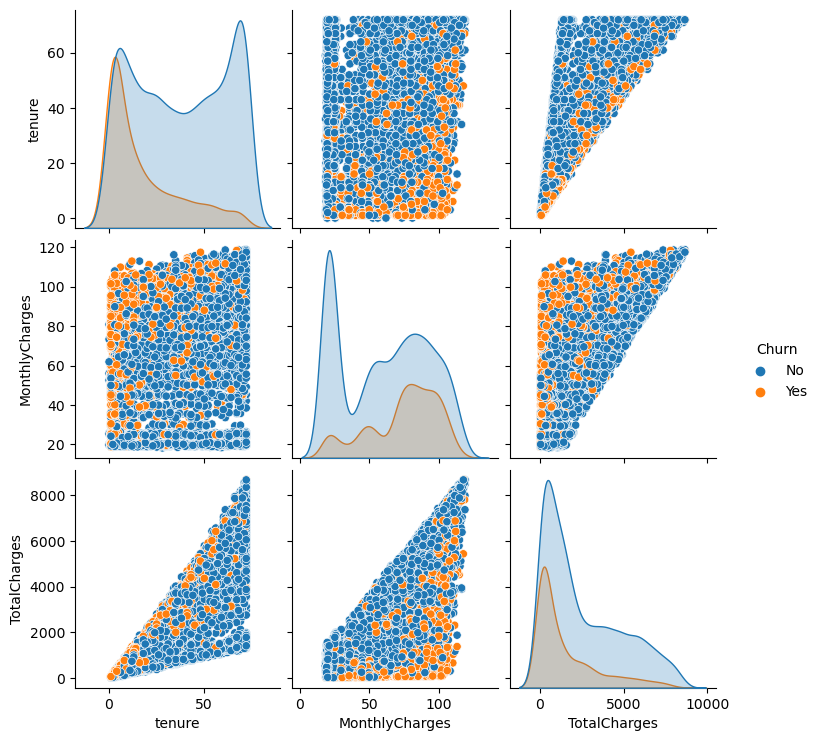

In [33]:
# select columns to include in the scatter plot matrix
cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# create scatter plot matrix using pairplot() function
sns.pairplot(customer_tel[cols], hue='Churn')

# display the plot
plt.show()

From the Scatter Maatrix:
- Those with less than 40 months and MonthlyCharges above 80 tend to churn a lot.
- Those with MonthlyCharges in excess of 75 and TotalCharges below 4000 tend to churn more.
- And that tenure and TotalCharges have positive correlation